In [3]:
import sys
import os

# Correct path configuration
sys.path.append(os.path.join(os.getcwd(), '../src/evaluation'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the class and create an instance
from model_validator_0169 import ModelValidator
validator = ModelValidator()  # Create instance here

from test_framework_0169 import run_all_tests

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Day 1: Validation Framework Setup")
print("Member 0169 - Model Evaluation & Deployment")

# Execute tests (assuming run_all_tests uses the validator instance)
run_all_tests  # Pass validator instance if needed

Day 1: Validation Framework Setup
Member 0169 - Model Evaluation & Deployment


<function test_framework_0169.run_all_tests()>

In [4]:
# Cell 2: Load and explore LIAR dataset
# Load the datasets
try:
    train_df = pd.read_csv('../data/raw/train.tsv', sep='\t', header=None)
    test_df = pd.read_csv('../data/raw/test.tsv', sep='\t', header=None) 
    valid_df = pd.read_csv('../data/raw/valid.tsv', sep='\t', header=None)
    
    # Define column names based on LIAR dataset structure
    columns = ['id', 'label', 'statement', 'subject', 'speaker', 'job', 
              'state', 'party', 'barely_true', 'false', 'half_true', 
              'mostly_true', 'pants_fire', 'context']
    
    train_df.columns = columns
    test_df.columns = columns  
    valid_df.columns = columns
    
    print("Dataset loaded successfully!")
    print(f"Training set: {train_df.shape}")
    print(f"Test set: {test_df.shape}")
    print(f"Validation set: {valid_df.shape}")
    
except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    print("Please ensure the LIAR dataset files are in data/raw/")

Dataset loaded successfully!
Training set: (10240, 14)
Test set: (1267, 14)
Validation set: (1284, 14)


Label Distribution:
label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Basic Statistics:
Total samples: 10240
Unique speakers: 2910
Unique subjects: 3827


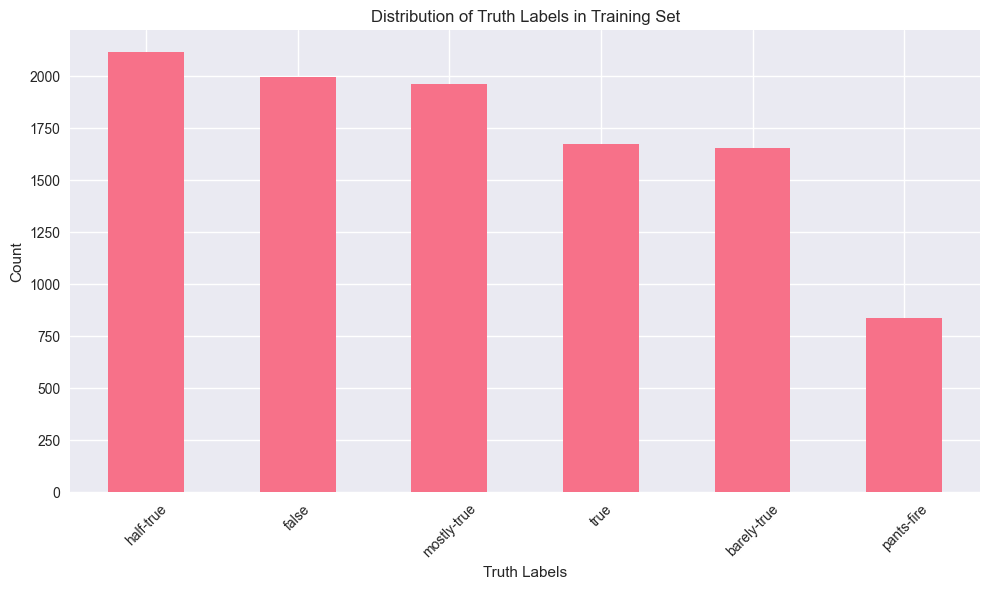

In [6]:
#Basic data exploration
import os
import matplotlib.pyplot as plt

# Create the directory structure if it doesn't exist
os.makedirs('../results/plots/', exist_ok=True)

# Basic data exploration
if 'train_df' in locals():
    print("Label Distribution:")
    print(train_df['label'].value_counts())
    
    print("\nBasic Statistics:")
    print(f"Total samples: {len(train_df)}")
    print(f"Unique speakers: {train_df['speaker'].nunique()}")
    print(f"Unique subjects: {train_df['subject'].nunique()}")
    
    # Visualize label distribution
    plt.figure(figsize=(10, 6))
    train_df['label'].value_counts().plot(kind='bar')
    plt.title('Distribution of Truth Labels in Training Set')
    plt.xlabel('Truth Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot - directory now exists
    plt.savefig('../results/plots/label_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

In [7]:
#Initialize validation framework
# Create validator instance
validator = ModelValidator(cv_folds=5, random_state=42)

# Define class names for LIAR dataset
class_names = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

print("Validation framework initialized!")
print(f"Cross-validation folds: {validator.cv_folds}")
print(f"Class names: {class_names}")

Validation framework initialized!
Cross-validation folds: 5
Class names: ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']


In [8]:
#Run basic tests
print("Running basic tests...")
test_results = run_all_tests()

if test_results:
    print("✅ All tests passed!")
else:
    print("❌ Some tests failed. Please check the test output above.")

test_data_loading (test_framework_0169.TestDataPipeline.test_data_loading)
Test data loading functionality ... ok
test_no_null_statements (test_framework_0169.TestDataPipeline.test_no_null_statements)
Test that statements are not null ... ok
test_required_columns (test_framework_0169.TestDataPipeline.test_required_columns)
Test if required columns exist ... ok
test_model_prediction (test_framework_0169.TestModelPipeline.test_model_prediction)
Test model can make predictions ... ok
test_prediction_types (test_framework_0169.TestModelPipeline.test_prediction_types)
Test prediction types are valid ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.015s

OK


Running basic tests...
✅ All tests passed!
